# Numpy基础:数组与向量化计算

- Numpy Numerical Python
- ndarray 一种高效多维数组，提供了基于数组的便捷算术操作以及灵活的广播功能。

In [3]:
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [4]:
%time for _ in range(10):my_arr = my_arr * 2

Wall time: 35.9 ms


In [6]:
%time for _ in range(10): my_list = [x*2 for x in my_list]

Wall time: 1.05 s


## Numpy ndarray:多维数组对象

- N维数组对象，ndarray,是Python中的一个快速，灵活的大型数据集容器。
- 一个ndarray是一个通用的多维同类数据容器，也即它包含的每一个元素均为相同类型。
- 每个数组有一个`shape`属性，用来表征数组每一维度的数量。
- 每一个属于有一个`dtype`属性，用来描述数组的数据类型。

In [10]:
import numpy as np

# 生成一个两行三列的随机数组
data = np.random.randn(2, 3)
data

array([[ 0.58858138, -1.18505005,  0.44300529],
       [ 0.69817289,  1.81507914, -0.00645723]])

In [12]:
data * 10

array([[  5.8858138 , -11.85050052,   4.4300529 ],
       [  6.98172891,  18.15079136,  -0.06457231]])

In [13]:
data + data

array([[ 1.17716276, -2.3701001 ,  0.88601058],
       [ 1.39634578,  3.63015827, -0.01291446]])

In [15]:
data.shape

(2, 3)

In [16]:
data.dtype

dtype('float64')

### 生成ndarray对象

- 嵌套序列会自动转化为多维数组
- 除非显式指定，否则`np.array`会自动推断生成数组的数据类型，数据类型存储在`dtype`的元数据中
- 创建一个高维数组，需要用`shape`传递一个元组
- 使用`np.empty`创建全零数组并不安全，有时候可能会返回未初始化的垃圾数值
- numpy的默认数据类型是`float64`浮点型

In [17]:
# 使用列表和array函数生成一个ndarray对象
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [18]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [19]:
# ndim表示数组的维度
arr2.ndim

2

In [20]:
arr2.shape

(2, 4)

In [21]:
arr1.dtype

dtype('float64')

In [22]:
arr2.dtype

dtype('int32')

In [24]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [27]:
np.empty((2, 3, 2))

array([[[8.37296314e-312, 3.16202013e-322],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 8.60815474e-043]],

       [[1.22082876e+165, 1.46285653e-047],
        [2.54576467e-052, 6.89072307e-042],
        [6.52637899e-042, 4.95419889e-062]]])

In [29]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

数组生成函数

|函数名|描述|
|:-|:-|
|array|将输入数据(可以是列表，元组、数组以及其他序列)转换为ndarray，如果不显式指明数据类型，将自动推断，默认复制所有的输入数据|
|asarray|将输入转换为ndarray，但如果输入已经是ndarray则不再复制|
|arange|Python的内建函数的数组版，返回一个数组|
|ones|根据给定形状和数据类型生成全1数组|
|ones_like|根据给定的数组生成一个形状一样的全1数组|
|zeros|根据给定形状和数据类型生成全0数组|
|zeros_like|根据给定的数组生成一个形状一样的全0数组|
|empty|根据给定形状生成一个没有初始化数值的空数组|
|empty_like|根据给定数组生成一个形状一样但没有初始化数值的空数组|
|full|根据给定的形状和数据类型生成指定数值的数组|
|full_like|根据给定的数组生成一个形状一样但内容是指定值的数组|
|eye, identity|生成一个N\*N特征矩阵(对角线位置都是1，其余位置是0)|

### ndarray的数据类型

- 数据类型，即`dtype`是一个特殊的对象，包含了ndarray需要为某一种类型的数据所声明的内存块信息(也称为元数据，即表示数据的数据)
- 数据的`dtype`命名方式为类型名再接上表示每个元素位数的数字
- 使用`astype`方法能够显式的转化数组的数据类型，将浮点数转化为整数时小数点后面的部分将被消除。
- Numpy中使用`numpy.string_`类型作字符串数据时要小心，因为numpy会删除它的大小或删除输入且不发生警告
- 类型转换失败是会抛出ValueError
- 可使用`float`代替`float64`解释为Numpy可以使用相同别名来表征与Python精度相同的Python数据类型
- 使用`astype`时总是生成一个新的数组

In [31]:
# 额外指定数据类型
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

print(arr1.dtype)
print(arr2.dtype)

float64
int32


Numpy数据类型


|类型|类型代码|描述|
|:-|:-|:-|
|int8, uint8|i1, u1|有符号和无符号的8数位整数|
|int16, uint16|i2, u2|有符号和无符号的16数位整数|
|int32, uint32|i4, u4|有符号和无符号的32数位整数|
|int64, uint64|i8, u8|有符号和无符号的64数位整数|
|float16|f2|半精度浮点数|
|float32|f4或f|标准单精度浮点数，兼容C语言float|
|float64|f8或d|标准双精度浮点数，兼容C语言double和Python float|
|float128|f16或g|拓展精度浮点数|
|complex64|c8,c16,c32|分别基于32位，64位，128位浮点数的复数|
|complex128
|complex256
|bool|?|布尔值，存储True或False|
|object|O|Python object类型|
|string_|S|修正的ASCII字符串类型，例如生成一个长度为10的字符串类型，使用'$10'|
|unicode_|U|修正的Unicode类型，生成一个长度为10的Unicode类型，使用'U10'|

In [32]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

In [33]:
# 使用astype方法显式的将整数转换为浮点数
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [34]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [37]:
# 将浮点数类型换为整数
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [39]:
# 将字符串转化为数字

numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
print(numeric_strings)
numeric_strings.astype(np.float64)

[b'1.25' b'-9.6' b'42']


array([ 1.25, -9.6 , 42.  ])

In [43]:
# 使用已知ndarray的dtype的作为另一个ndarray的数据类型

int_array = np.arange(10)
print(int_array.dtype)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

int32


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [44]:
# 可以使用类型代码传入数据类型

empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### Numpy的数组算术

- 数组允许进行批量操作而无需for循环，称这种特征为`向量化`
- 任何在两个等尺寸数组之间的算术操作都应用了`逐元素操作`的方法
- 带有标量计算的算术操作，会把计算参数传递给数组的每一个元素
- 同尺寸数组之间的比较会产生一个布尔值数组
- 不同尺寸数据之间的操作，将会用到广播特性

In [45]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [46]:
# 元素之间逐个相乘
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [47]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [48]:
# 数组中的每个元素取倒数
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [ ]:
# 数组中的每个元素取平方根
arr ** 0.5

In [49]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [51]:
# 对应位置的元素进行比较
print(arr)
print(arr2)
arr2 > arr

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 0.  4.  1.]
 [ 7.  2. 12.]]


array([[False,  True, False],
       [ True, False,  True]])

### 基础索引与切片

- 数组的切片数原数组的视图，任何对于视图的修改都会反映到原数组上
- 不写切片值的`[:]`将会引用数组的所有值
- 要使用数组切片的拷贝而不是视图时需要显式的指定`arr[5:8].copy()`
- 二维数组中，每个索引值对应的元素不再是一个值，而是一个一维数组
- `0轴`看做`行`，`1轴`看做`列`
- 多维数组中省略后续索引值，返回的对象将是降低一个维度的数组
- 数组子集的选择中，返回的数组都是视图

In [52]:
arr = np.arange(10)
print(arr)
print(arr[5])

[0 1 2 3 4 5 6 7 8 9]
5


In [53]:
arr[5:8]

array([5, 6, 7])

In [54]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [55]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [56]:
# 当改变arr_slice时，变化也会体现在原数组上
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [ ]:
arr_slice[1] 

In [57]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [58]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [59]:
# 效果相同
print(arr2d[0][2])
print(arr2d[0, 2])

3
3


In [60]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [61]:
# 得到的是降低一个维度的数组
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [62]:
old_values = arr3d[0].copy()
arr3d[0] = 42
print(arr3d)
arr3d[0] = old_values
print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [63]:
# 返回一个一维数组

arr3d[1, 0]

array([7, 8, 9])

In [64]:
arr3d[1][0]

array([7, 8, 9])

In [65]:
# 上面的表达式分解为以下两步

x = arr3d[1]
print(x)
print(x[0])

[[ 7  8  9]
 [10 11 12]]
[7 8 9]


#### 数组的切片索引

- 单独一个冒号表示选择整个轴上的数组
- 对切片表达式赋值时，整个表达式都会被重新赋值

In [66]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [67]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [68]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [69]:
# 选择arr2d的前两行
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [70]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [71]:
# 选择第二行的前两列

arr2d[1, :2]

array([4, 5])

In [73]:
# 第三列的前两行
arr2d[:2, 2]

array([3, 6])

In [74]:
# 行全部选，类只选第一列
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [75]:
# 对切片表达式赋值时，整个表达式都会被重新赋值
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 布尔索引

- 索引数组时可以传入布尔型数组
- 布尔型数组的长度必须和数组轴索引长度一致
- 使用`!=`或者在条件表达式前使用`~`对条件取反
- 使用`&(and)`或者`|(or)`来对多个布尔值进行联合
- 使用布尔索引选择数据时，总是生成数据的拷贝，即使返回的数组没有任何变化

In [12]:
import numpy as np
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.24366971  0.27685217 -1.67695649 -0.25549584]
 [ 0.38344342 -2.22986271 -0.25430831 -1.6373676 ]
 [ 0.20632764 -1.82458483 -0.57098809  0.48347453]
 [-1.71734585 -0.10530803  1.23178956  0.28488725]
 [-1.30606128  0.09588669 -1.31970205 -1.26370988]
 [-0.89717008  0.30064844  1.35711122  1.83292586]
 [ 1.45069989  0.57922024 -0.67672249  0.43865992]]


In [13]:
# 选中所有Bob对应的行
# 等于Bob的为True,否则为False
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [14]:
data[names == 'Bob']

array([[-0.24366971,  0.27685217, -1.67695649, -0.25549584],
       [-1.71734585, -0.10530803,  1.23178956,  0.28488725]])

In [15]:
# 选中指定行，并索引各个列
data[names == 'Bob', 2:]

array([[-1.67695649, -0.25549584],
       [ 1.23178956,  0.28488725]])

In [16]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [17]:
data[~(names == 'Bob')]

array([[ 0.38344342, -2.22986271, -0.25430831, -1.6373676 ],
       [ 0.20632764, -1.82458483, -0.57098809,  0.48347453],
       [-1.30606128,  0.09588669, -1.31970205, -1.26370988],
       [-0.89717008,  0.30064844,  1.35711122,  1.83292586],
       [ 1.45069989,  0.57922024, -0.67672249,  0.43865992]])

In [18]:
cond = names == 'Bob'
data[~cond]

array([[ 0.38344342, -2.22986271, -0.25430831, -1.6373676 ],
       [ 0.20632764, -1.82458483, -0.57098809,  0.48347453],
       [-1.30606128,  0.09588669, -1.31970205, -1.26370988],
       [-0.89717008,  0.30064844,  1.35711122,  1.83292586],
       [ 1.45069989,  0.57922024, -0.67672249,  0.43865992]])

In [19]:
# 两个条件
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [20]:
data[mask]

array([[-0.24366971,  0.27685217, -1.67695649, -0.25549584],
       [ 0.20632764, -1.82458483, -0.57098809,  0.48347453],
       [-1.71734585, -0.10530803,  1.23178956,  0.28488725],
       [-1.30606128,  0.09588669, -1.31970205, -1.26370988]])

In [21]:
# 将data中的所有负值设置为0
data[data < 0] = 0
data

array([[0.        , 0.27685217, 0.        , 0.        ],
       [0.38344342, 0.        , 0.        , 0.        ],
       [0.20632764, 0.        , 0.        , 0.48347453],
       [0.        , 0.        , 1.23178956, 0.28488725],
       [0.        , 0.09588669, 0.        , 0.        ],
       [0.        , 0.30064844, 1.35711122, 1.83292586],
       [1.45069989, 0.57922024, 0.        , 0.43865992]])

In [22]:
# 利用一维布尔值数组对每一行设置数值
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.38344342, 0.        , 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.30064844, 1.35711122, 1.83292586],
       [1.45069989, 0.57922024, 0.        , 0.43865992]])

### 神奇索引

- 神奇索引是Numpy中的术语，用于描述使用整数数组进行数据索引
- 为选出一个符合特定顺序的子集，可以简单通过传递一个包含指明所需顺序的列表或数组来完成
- 使用负的索引则从尾部开始选取
- 传递多个索引数组时，会根据每个索引元组对应的元素选出一个一维数组
- 神奇索引是将数据复制到一个新的数组中

In [23]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i

print(arr)

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]


In [24]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [25]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [26]:
arr = np.arange(32).reshape((8, 4))
print(arr)
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


array([ 4, 23, 29, 10])

In [27]:
# 先选取指定行，然后将选中行中的有关列进行交换
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 数组转置与换轴

- 转置是一种特殊的数据重组形式，可以返回底层数据的视图而不需要赋值任何内容。数组拥有transpose方法，也有特殊的T属性。
- 计算矩阵的内积时使用`np.dot`
- 对于更高维度的矩阵，`transpose`方法可以接受包含周边好的元组，用于置换轴
- `swapaxes`方法接受一对轴作为参数，并对轴进行调整用于重组参数.`swapaxes`返回的是数据的视图，而没有对数据进行复制

In [28]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [29]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [31]:
arr = np.random.randn(6, 3)
arr

array([[-1.47725429, -1.99879188, -0.67060623],
       [-1.11555094, -0.20029615, -0.13874233],
       [ 0.0993477 , -0.37430883, -0.77026181],
       [-0.4831596 , -0.12269767, -0.57150129],
       [-1.89987621, -0.26297299, -0.91516861],
       [ 0.54031122,  0.53441212, -1.05593832]])

In [32]:
np.dot(arr.T, arr)

array([[7.57151312, 3.98662526, 2.51320442],
       [3.98662526, 4.54520045, 1.40298792],
       [2.51320442, 1.40298792, 3.34141845]])

In [33]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [34]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [35]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [36]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 通用函数：快速的逐元素数组函数

- 通用函数，也称为`ufunc`，是一种才ndarray数据中进行逐元素操作的函数
- 一元通用函数，即逐元素的转化
- 二元通用函数，接受两个数组并返回一个数组作为结果

In [39]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [42]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [43]:
x = np.random.randn(8)
y = np.random.randn(8)
print(x)
print(y)

[-0.90016557  1.55666542  0.95139613 -1.94784905 -0.75652924  1.51057291
 -0.91739309 -0.39825499]
[-0.44291126  1.48942929 -0.86399578  0.38508275 -0.76574728 -0.18553293
 -0.22795283 -1.26891283]


In [44]:
# 得到两个数组中的较大值
np.maximum(x, y)

array([-0.44291126,  1.55666542,  0.95139613,  0.38508275, -0.75652924,
        1.51057291, -0.22795283, -0.39825499])

In [45]:
arr = np.random.randn(7)*5
arr

array([4.39998964, 4.2674972 , 1.03356162, 4.75434192, 2.98040189,
       4.11834445, 6.7460203 ])

In [47]:
# 将数组中数值的整数部分和小数部分分离
reminder, whole_part = np.modf(arr)
print(reminder)
print(whole_part)

[0.39998964 0.2674972  0.03356162 0.75434192 0.98040189 0.11834445
 0.7460203 ]
[4. 4. 1. 4. 2. 4. 6.]


In [48]:
arr

array([4.39998964, 4.2674972 , 1.03356162, 4.75434192, 2.98040189,
       4.11834445, 6.7460203 ])

In [49]:
np.sqrt(arr)

array([2.09761523, 2.06579215, 1.01664233, 2.18044535, 1.72638405,
       2.02937046, 2.5973102 ])

In [50]:
np.sqrt(arr, arr)

array([2.09761523, 2.06579215, 1.01664233, 2.18044535, 1.72638405,
       2.02937046, 2.5973102 ])

In [51]:
arr

array([2.09761523, 2.06579215, 1.01664233, 2.18044535, 1.72638405,
       2.02937046, 2.5973102 ])

一元通用函数

|函数名|描述|
|:-|:-|
|abs,fabs|逐元素的计算整数，浮点数或复数的绝对值|
|sqrt|计算每个元素的平方根(与arr \*\* 0.5相等)|
|square|计算每个元素的平方(与arr \*\* 2相等)|
|exp|计算每个元素的自然指数值$e^x$|
|log, log10, log2, log1p|分别对应：自然对数($e$为底),对数$10$为底，对数$2$为底，$log(1+x)$|
|sign|计算每个元素的符号值:1(正数)，0(0), -1(负数)|
|ceil|计算每个元素的最高整数值(即大于等于给定数值的最小整数)|
|floor|计算每个元素的最小整数值(即小于等于给定数值的最大整数)|
|rint|将元素保留到整数位，并保留dtype|
|modf|分别将数组的小数部分和整数部分按数组形式返回|
|isnan|返回数组中的元素是否是一个NaN(不是一个数值)，形式为布尔值数组|
|isfinite,isinf|分别返回数组中的元素是否有限(非inf, 非NaN),是否无限的，形式为布尔值数组|
|cos, cosh, sin, sinh, tan, tanh|常规的双曲三角函数|
|arccos, arccosh, arcsin, arcsinh, arctan, arctanh|反三角函数|
|logical_not|对数组的元素按位取反(与~arr的效果一致)|

二元通用函数

|函数名|描述|
|:-|:-|
|add|将数组的对应元素相加|
|subtract|在第二个数组中，将第一个数组中包含的元素去除|
|multiply|将数组的对应元素相乘|
|divide, floor_divide|除或整除(放弃余数)|
|power|将第二个数组的元素作为第一个数组对应元素的幂次方|
|maxinum, fmax|逐个元素计算最大值,fmax忽略NaN|
|minimun, fmin|逐个元素计算最小值,fmin忽略NaN|
|mod|按元素的求模运算(即求除法的余数)|
|copysign|将第一个数组的符号值改为第二个数组的符号值|
|greater, greater_equal, less, less_equal, equal, not_equal|进行逐个元素的比较,返回布尔型数组,(与书序操作符>, >=, <, <=, ==, !=效果一致)|
|logical_and, logical_or, logical_xor|进行逐个元素的逻辑操作(与逻辑操作符&、\|、\^效果一致)|

## 使用数组进行面向数组编程

- 利用数组表达式来替代显式循环的方法称为`向量化`
- `np.meshgrid`函数接受两个一维数组，并根据连个数组的所有(x,y)对生成一个二维矩阵

In [54]:
points = np.arange(-5, 5, 0.01)  # 1000 equally spaced points

In [55]:
xs, ys = np.meshgrid(points, points)

In [56]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [58]:
points

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

In [59]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [60]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5,1,'Image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

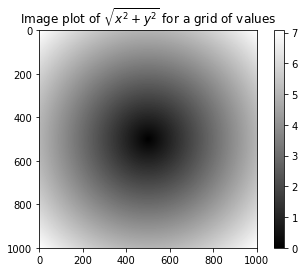

In [63]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray);plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")

### 将条件逻辑作为数组编程

- `numpy.where`函数是三元表达式`x if condition else y`的向量化版本
- `np.where`的第二个和第三个参数并不需要是数组，可以是标量，典型用法是根据一个数组来生成一个新的数组
- 使用`np.where`将标量和数组联合
- 传递给`np.where`的数组既可以是同等大小的数组，也可以是标量

In [65]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

result = [x if c else y for x,y,c in zip(xarr, yarr, cond)]
print(result)

[1.1, 2.2, 1.3, 1.4, 2.5]


In [67]:
result = np.where(cond, xarr, yarr)
print(result)

[1.1 2.2 1.3 1.4 2.5]


In [69]:
# 将随机生成的数组中的所有正值替换为2，负值替换为-2

arr = np.random.randn(4, 4)
print(arr)
print(arr > 0)
np.where(arr>0, 2, -2)

[[-0.20193923 -0.21292912  0.15454254  0.2917885 ]
 [ 0.57610063  2.06376088  1.08258118  0.31094977]
 [-0.4478837   0.35621712 -0.5425155   0.72619081]
 [ 0.65709205 -0.65135066 -0.33926606 -1.97936692]]
[[False False  True  True]
 [ True  True  True  True]
 [False  True False  True]
 [ True False False False]]


array([[-2, -2,  2,  2],
       [ 2,  2,  2,  2],
       [-2,  2, -2,  2],
       [ 2, -2, -2, -2]])

In [70]:
# 将arr中的所有正值替换为常数2

np.where(arr>0, 2, arr)

array([[-0.20193923, -0.21292912,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        ,  2.        ],
       [-0.4478837 ,  2.        , -0.5425155 ,  2.        ],
       [ 2.        , -0.65135066, -0.33926606, -1.97936692]])

### 数学和统计方法

- `mean`和`sum`等函数可以接受一个可选参数axis用于计算给定轴向上的统计值，形成一个下降一位维度数组
- `cumsum`和`cumprod`并不会聚合，产生一个中间结果
- 多维数组中，cumsum等累积函数返回相同长度的数组，但是可以在指定轴向上根据较低维度的切片进行部分聚合。

In [71]:
arr = np.random.randn(5, 4)
arr.mean()

-0.5722756804785284

In [76]:
arr

array([[ 0.39127528,  0.0410132 ,  0.77197852, -1.31589999],
       [ 0.24600684, -0.18860686,  0.86256476,  0.53665962],
       [-2.03257347, -1.6900707 , -2.59024659, -0.56626911],
       [-1.59417381, -0.58957932,  0.23024513, -0.82749503],
       [-0.13906722,  0.21655228, -0.91957475, -2.28825237]])

In [72]:
# 与上面的效果相同
np.mean(arr)

-0.5722756804785284

In [73]:
arr.sum()

-11.445513609570568

In [74]:
arr.mean(axis=1)

array([-0.02790825,  0.36415609, -1.71978997, -0.69525076, -0.78258551])

In [75]:
arr.sum(axis=0)

array([-3.12853239, -2.21069142, -1.64503292, -4.46125688])

In [77]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [78]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [79]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

In [80]:
arr.cumprod(axis=0)

array([[ 0,  1,  2],
       [ 0,  4, 10],
       [ 0, 28, 80]], dtype=int32)

基础数组的统计方法

|方法|描述|
|:-|:-|
|sum|沿着轴向计算所有元素的累和，0长度的数组，累和为0|
|mean|数学平均，0长度的数组平均值为NaN|
|std,var|标准差和方差，可以选择自由度调整(默认分母是0)|
|min, max|最小值和最大值|
|argmin, argmax|最小值和最大值的位置|
|cumsum|从0开始元素累积和|
|cumprod|从1开始元素累积积|

### 布尔值数组的方法

- `sum`函数可以用来计算布尔值数组中True的个数
- 布尔型数组中`any`方法用来检查数组中是否至少有一个True`all`方法检查是否每个值都是True
- 有些方法也适用于非布尔型数组，所有的非0元素都会按照True处理

In [82]:
arr = np.random.randn(100)

In [83]:
# 正值的个数
(arr>0).sum()

48

In [84]:
bools = np.array([False, False, True, False])
bools.any()

True

In [85]:
bools.all()

False

### 排序

- 使用`sort`方法按照位置排序
- 在多维数组中根据传递的axis值，沿轴向对每一个一维数组段进行排序
- 顶层的`np.sort`方法返回的是已经排好序的数组拷贝，而不是对原数组按位置排序

In [86]:
arr = np.random.randn(6)
print(arr)

[-0.68308839 -1.39793669  0.68377094  0.06148961 -0.1040046  -1.19086065]


In [88]:
arr.sort()
arr

array([-1.39793669, -1.19086065, -0.68308839, -0.1040046 ,  0.06148961,
        0.68377094])

In [91]:
arr = np.random.randn(5, 3)
print(arr)
arr.sort(1)
arr

[[-0.04881273 -2.03793896  0.3366231 ]
 [-1.60444508 -2.50874289  0.93938153]
 [ 0.10336186  0.46364563 -1.71522823]
 [-1.08940429  0.46568019  0.75337032]
 [-0.22730679  0.48606503 -1.01536068]]


array([[-2.03793896, -0.04881273,  0.3366231 ],
       [-2.50874289, -1.60444508,  0.93938153],
       [-1.71522823,  0.10336186,  0.46364563],
       [-1.08940429,  0.46568019,  0.75337032],
       [-1.01536068, -0.22730679,  0.48606503]])

In [93]:
# 计算一个数组的分位数，并选出分位数所对应的值
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))]  # 5% quantile

-1.6640841090681204

### 唯一值与其他集合逻辑

- Numpy中包含一些针对一维nadrray的基础集合操作
- np.unique返回的是数组中唯一值排序后形成的数组
- np.in1d可以检查一个数组中的值师傅在另外一个数组中，并返回一个布尔型数组

In [95]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [96]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [97]:
# 将np.unique和纯Python代码比较

sorted(set(names))

['Bob', 'Joe', 'Will']

In [99]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [100]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

数组的集合操作

|方法|描述|
|:-|:-|
|unique(x)|计算x的唯一值，并排序|
|intersect1d(x, y)|计算x和y的交集，并排序|
|union1d(x, y)|计算x和y的并集，并排序|
|in1d(x,y)|计算x中的元素是否包含在y中，并返回一个布尔型数组|
|setdiff(x, y)|差集,在x中但不在y中的x的元素|
|setxor1d(x, y)|异或集，在x或y中，但不属于x，y交集的元素|

## 使用数组进行文件输入输出

- Numpy可以在硬盘中将数据以文本或二进制文件的形式进行存入硬盘或有硬盘载入
- `np,load`和`np.save`是高效存取硬盘数据的两大工具函数，默认情况下是以未压缩的格式进行存储的，后缀名是`.npy`
- 使用`np.savez`并将数组作为参数传递给该函数，用于在未压缩文件中保存多个数组
- 使用`numpy.savez_compressed`讲数据存入已经压缩的文件

In [2]:
import numpy as np
arr = np.arange(10)
# 如果文件存放路径没有写.npy是，后缀名将会被自动加上
np.save('some_array.npy', arr)

In [3]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.savez('array_archive.npz', a=arr, b=arr)

In [6]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## 线性代数

- Numpy中的`*`是矩阵的逐元素乘积，函数`dot`用于矩阵的操作
- `x.dot(y)`等价于`np.dot(x,y)`
- 特殊符号`@`也作为中缀操作符，用于点乘矩阵操作

In [16]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print(x)
print(y)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]


In [17]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [18]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [19]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [20]:
x @ np.ones(3)

array([ 6., 15.])

In [22]:
from numpy.linalg import inv, qr

X = np.random.randn(5, 5)
# X的转置矩阵X.T和X的点乘积
mat = X.T.dot(X)

In [23]:
inv(mat)

array([[ 1.13401645,  0.21165735,  0.48084028,  1.60993456, -0.81744685],
       [ 0.21165735,  0.24164739,  0.06164727,  0.89445237, -0.70830605],
       [ 0.48084028,  0.06164727,  0.81392757,  1.72856027, -0.63068659],
       [ 1.60993456,  0.89445237,  1.72856027, 12.05538743, -8.57143533],
       [-0.81744685, -0.70830605, -0.63068659, -8.57143533,  7.19364703]])

In [24]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  9.67318331e-18, -1.34105570e-17,
         8.19136675e-17,  8.08870773e-17],
       [ 2.47655731e-17,  1.00000000e+00, -3.79257919e-18,
         4.57197889e-16, -1.10550321e-15],
       [-2.66129602e-16, -2.41595034e-16,  1.00000000e+00,
        -2.98015657e-15,  3.72491571e-16],
       [ 3.17783460e-16,  1.64230165e-16,  6.54900501e-17,
         1.00000000e+00, -1.95263086e-15],
       [-1.51905764e-16, -1.16025838e-16,  4.50692042e-17,
        -4.65629917e-16,  1.00000000e+00]])

In [25]:
q, r = qr(mat)

In [26]:
print(q)
print(r)

[[-0.76481656 -0.53909226 -0.08742011 -0.33394972 -0.07259794]
 [ 0.55673999 -0.81867887  0.12271842  0.02808267 -0.06290508]
 [ 0.29177435  0.06850665 -0.7658309  -0.56616279 -0.05601165]
 [ 0.09399816  0.17218702  0.43298265 -0.4410945  -0.76123429]
 [ 0.10549068  0.06930305  0.45091793 -0.61039683  0.63887209]]
[[-1.83795914  4.8138291   1.86222491 -0.3658924   0.00708657]
 [ 0.         -4.93130966 -0.8102421   0.70314797  0.29086847]
 [ 0.          0.         -5.16123649  3.26400297  3.49933567]
 [ 0.          0.          0.         -0.63421462 -0.84053699]
 [ 0.          0.          0.          0.          0.0888106 ]]


常用numpy.linalg函数

|函数|描述|
|:-|:-|
|diag|将一个方阵的对角(或非对角)元素作为一维数组返回，或者将一维数组转换成一个方阵，并且在非对角线上有零点|
|dot|矩阵点乘|
|trace|计算对角元素和|
|det|计算矩阵的行列式|
|eig|计算方阵的特征值和特征向量|
|inv|计算方阵的逆|
|pinv|计算矩阵的Moore-Penrose伪逆|
|qr|计算QR分解|
|svd|计算奇异值分解(SVD)|
|solve|求解x的线性系统Ax=b,其中A是方阵|
|lstsq|计算Ax=b的最小二乘解|

## 伪随机数生成

- numpy.random可以高效地生成多种概率分布小的完整样本值数组
- numpy.random中的数据生成函数共用了一个全局的随机数种子
- 使用`numpy.random.RandomState`生成一个随机数生成器

In [ ]:
# 获得一个正态分布样本数组

In [27]:
samples = np.random.normal(size=(4,4))

In [28]:
samples

array([[-0.45847264,  0.86742999, -0.19205521, -0.06051623],
       [-0.19024151, -0.46292765,  1.09467816,  1.60518243],
       [-0.39771739,  0.1070538 , -0.47159061, -1.59743216],
       [ 0.55437027,  0.68771212, -0.31159344, -2.79389441]])

In [29]:
from random import normalvariate

N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

796 ms ± 50.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%timeit np.random.normal(size=N)

30.6 ms ± 344 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
# 设置随机种子

np.random.seed(1234)

In [32]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

Numpy.random中的部分函数列表

|函数|描述|
|:-|:-|
|seed|想随机数生成器传递随机状态种子|
|permutation|返回一个序列的随机排列，或者返回一个乱序的整数范围序列|
|shuffle|随机排列一个序列|
|rand|从均匀分布中抽取样本|
|randint|根据给定的由低到高的范围抽取随机整数|
|randn|从均值0方差1的正态分布中抽取样本(MATLAB)型接口|
|binomial|从二项分布中抽取样本|
|normal|从正态(高斯)分布中抽取样本|
|beta|从beta分布中抽取样本|
|chisquare|从卡方分布中抽取样本|
|gamma|从伽马分布中抽取样本|
|uniform|从均匀\[0,1\)分布中抽取样本|

## 示例:随机漫步

In [34]:
import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

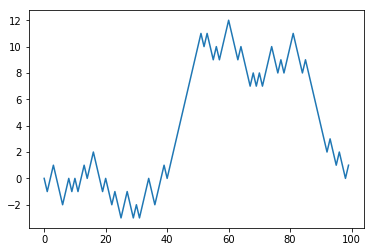

In [36]:
import matplotlib.pyplot as plt

plt.plot(walk[:100])

In [39]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws>0, 1, -1)
walk = steps.cumsum()

In [41]:
walk.max()

31

In [42]:
walk.min()

-13

In [44]:
(np.abs(walk)>=10).argmax()

53

### 一次性模拟多次随机漫步

In [46]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws>0, 1, -1)
walks = steps.cumsum(1)
print(walks)

[[ -1  -2  -1 ... -28 -29 -30]
 [ -1  -2  -3 ...  66  65  64]
 [  1   0   1 ... -24 -23 -22]
 ...
 [ -1   0   1 ...  62  61  62]
 [  1   2   3 ... -24 -23 -24]
 [ -1   0  -1 ... -20 -19 -20]]


In [47]:
walks.max()

115

In [48]:
walks.min()

-114

In [49]:
hist30 = (np.abs(walks) >= 30).any(1)

In [50]:
hist30

array([ True,  True,  True, ...,  True,  True, False])

In [51]:
# 达到30或-30的总数
hist30.sum()

3400

In [53]:
hist30.size

5000

In [54]:
crossing_times = (np.abs(walks[hist30])>=30).argmax(1)

In [55]:
crossing_times.mean()

500.92176470588237

In [57]:
# 正态分布
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))